In [6]:
#If you need to install in modules in jupyter notebook 
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 
%pip install seaborn 
%pip install graphviz
%pip install scikit-plot   
%pip install statsmodels   


#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime # Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"


# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats
import scikitplot as skplt
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.linear_model import LinearRegression
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):

    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.

You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.



Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\shaun\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


In [7]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

In [262]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv') 

In [265]:
from sklearn import preprocessing

#Data Cleaning
df = df[~df.Name.str.contains('Mega')] #removed pokemon with "Mega" in it
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation"]) #Removed columns with names

#normalization
X = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
df=pd.DataFrame(x_scaled, columns=df.columns)


AttributeError: 'DataFrame' object has no attribute 'Name'

In [266]:
 #Splitting dataset to x and y
y = df.Attack
X = df[['Defense','HP','Sp. Atk','Sp. Def','Speed']]

In [232]:
X

,Defense,HP,Sp. Atk,Sp. Def,Speed
0,49,45,65,65,45
1,63,60,80,80,60
2,83,80,100,100,80
4,43,39,60,50,65
5,58,58,80,65,80
...,...,...,...,...,...
794,121,108,81,95,95
795,150,50,100,150,50
797,60,80,150,130,70
798,60,80,170,130,80


# MultiVariate  Regression with sklearn

In [39]:
 from sklearn.linear_model import LinearRegression

In [50]:
def MultiVariateLinearRegression(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)
  regr = LinearRegression()
  regr.fit(X, y)
  print('Intercept: \n', regr.intercept_)
  print('Coefficients: \n', regr.coef_)
  kf = KFold(n_splits=10, random_state=None, shuffle=True)
  kf.get_n_splits(X)
  for train_index, test_index in kf.split(X):
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_train)
  print("coefficient of determination score",r2_score(y_train,y_pred))
  print("mean squared error",mean_squared_error(y_train,y_pred,squared =False))


In [51]:
MultiVariateLinearRegression(X,y)

Intercept: 
 8.210680550338907
Coefficients: 
 [ 0.44614817  0.36994363  0.18231691 -0.31638889  0.29630742]
coefficient of determination score 0.4287816961403771
mean squared error 22.285849382912


In [267]:
X = X.HP

# Gradient Descent 

In [53]:
X_b = np.c_[np.ones((751, 1)), X]  # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[41.85738349  0.49688982]


In [54]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([41.85738349, 42.85116314])

In [99]:
eta = 0.1
n_iterations = 10
m = 100
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))
print (theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

[-0.91353895  0.36567757]


array([-1.03868168e+37, -8.14932855e+38])

In [56]:
X_b.dot(theta)

array([-7.57893295e+40, -1.01045286e+41, -1.34719895e+41, -6.56869470e+40,
       -9.76778251e+40, -1.31352434e+41, -7.41055991e+40, -9.93615556e+40,
       -1.33036164e+41, -7.57893295e+40, -8.42079817e+40, -1.01045286e+41,
       -6.73706774e+40, -7.57893295e+40, -1.09463938e+41, -6.73706774e+40,
       -1.06096477e+41, -1.39771086e+41, -5.05333731e+40, -9.26266338e+40,
       -6.73706774e+40, -1.09463938e+41, -5.89520252e+40, -1.01045286e+41,
       -5.89520252e+40, -1.01045286e+41, -8.42079817e+40, -1.26301242e+41,
       -9.26266338e+40, -1.17882590e+41, -1.51557199e+41, -7.74730600e+40,
       -1.02729016e+41, -1.36403625e+41, -1.17882590e+41, -1.59975851e+41,
       -6.40032165e+40, -1.22933782e+41, -1.93650460e+41, -2.35743720e+41,
       -6.73706774e+40, -1.26301242e+41, -7.57893295e+40, -1.01045286e+41,
       -1.26301242e+41, -5.89520252e+40, -1.01045286e+41, -1.01045286e+41,
       -1.17882590e+41, -1.68587645e+40, -5.89520252e+40, -6.73706774e+40,
       -1.09463938e+41, -

In [57]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
            
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 240, 0, 350])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

c:\users\shaun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  
c:\users\shaun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  
c:\users\shaun\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in subtract
  


Saving figure gradient_descent_plot


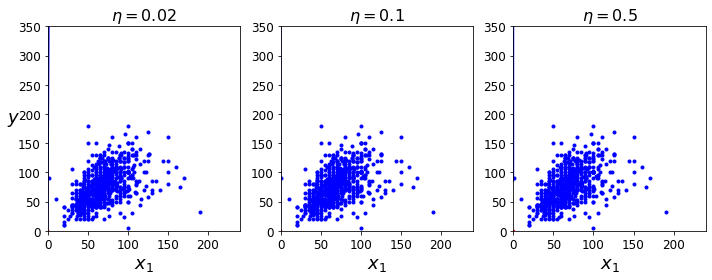

In [58]:
np.random.seed(42)
theta = np.random.randn(2, 1)
theta = np.squeeze(np.asarray(theta))

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

# Gradient Descent Mini Batch

In [279]:
def minibatch(X,y,eta):
    theta_path_mgd = []
    X_b = np.c_[np.ones((751, 1)), X]  # add x0 = 1 to each instance
    m = len(X_b)
    n_iterations = 50
    minibatch_size = 31  
    np.random.seed(42)
    theta = np.random.randn(2,1)  # random initialization 
    t0, t1 = 200, 1000
    def learning_schedule(t):
        return t0 / (t + t1) 
    t = 0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            theta_path_mgd.append(theta)
    theta

In [280]:
Xarr = [[i] for i in X]
Xarr = np.array(Xarr)
yarr = [[i] for i in y]
yarr = np.array(yarr)

In [281]:
minibatch(Xa,ya,0.1)
theta

array([-1.03868168e+37, -8.14932855e+38])

# Regularized Regression Model